#Gated Recurrent Unit using Tokenizer()


###Reference
data representation techniques (Tokenizer() class, Word2Vec and GloVe embedding): 'Deep Learning with Python' by Francois Chollet, 'Implement neural networks with Keras on Theano and TensorFlow' by Sujit Pal et al. 

spam detection example: https://towardsdatascience.com/nlp-spam-detection-in-sms-text-data-using-deep-learning-b8632db85cc8

recurrent layers: https://keras.io/api/layers/recurrent_layers/

###Mounting to Google Drive


In [ ]:
#connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import Libraries

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from keras.constraints import max_norm

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import Activation, Dense, Dropout, Flatten, SimpleRNN

from keras.constraints import max_norm

from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import classification_report
import seaborn as sns

import numpy as np
import tensorflow as tf


import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

####Load the Dataset


In [ ]:
# change file path 
data=pd.read_csv("/content/gdrive/MyDrive/Depression Project/DepressionDataFinal2Processed.csv")
data = data.astype(str)
data.head()

,Id,Text,Target
0,2.85e+17,one thing love life mother one ever come mine,1
1,2.9e+17,want perfect want happy,0
2,2.86e+17,mom hates dad hates today sucks fword life tho,0
3,2.86e+17,hate hate life,0
4,2.86e+17,feel good,1


In [ ]:
data.columns

Index(['Id', 'Text', 'Target'], dtype='object')

### Train, Val, Test split --> 60%, 20%, 20% 

In [ ]:
# x_train is the training data set
# y_train is the corresponding labels to x_train 
# x_test is the test dataset 
# y_test is the corresponding label to x_test 
x_train, x_test, y_train, y_test = train_test_split(data, data.Target, test_size=0.2, random_state=1)
# 0.25 x 0.8 = 0.2
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

### Find Maximum Length of Tweets - max_len constant



In [ ]:
# find maximum length of tweet
def max_len(x):
    a=x.split()
    return len(a)

max(data['Text'].apply(max_len))

20

In [ ]:
# maxlen = 20 --> maximum length of tweet = 20
max_len = 20

### Convert Label into Term-Document Matrix

In [ ]:
# Bag of Words used to one-hot encode Target label 
# use CountVectorizer to covert the label into tokens
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train=vectorizer.fit_transform(x_train['Target']).toarray()
y_test=vectorizer.fit_transform(x_test['Target']).toarray()
y_val=vectorizer.fit_transform(x_val['Target']).toarray()

### Tokenize tweets using Tokenizer()

In [ ]:
vect=Tokenizer()
vect.fit_on_texts(data['Text'])

### Find Size of Vectorized Tokens  - vocab_size constant



In [ ]:
vocab_size = len(vect.word_index) + 1
print(vocab_size)

1989


### Turn the Vectorized Tokens into Sequences of Integers


In [ ]:
encoded_docs_train = vect.texts_to_sequences(x_train['Text'])
encoded_docs_test =  vect.texts_to_sequences(x_test['Text'])
encoded_docs_cv = vect.texts_to_sequences(x_val['Text'])

### Padding and Making all the Sequences the same Length

In [ ]:
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=max_len, padding='post')
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_len, padding='post')
padded_docs_cv = pad_sequences(encoded_docs_cv, maxlen=max_len, padding='post')

### Build and compile DL Model

In [ ]:
model = Sequential()
# Configuring the parameters
model.add(Embedding(vocab_size, output_dim=50, input_length=max_len))
model.add(layers.GRU(32))
model.add(Dropout(0.7))
model.add(Dropout(0.7))
# Adding a dense output layer with sigmoid activation
model.add(Dense(2, activation='softmax', kernel_initializer='lecun_uniform'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            99450     
_________________________________________________________________
gru (GRU)                    (None, 32)                8064      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 107,580
Trainable params: 107,580
Non-trainable params: 0
_________________________________________________________________


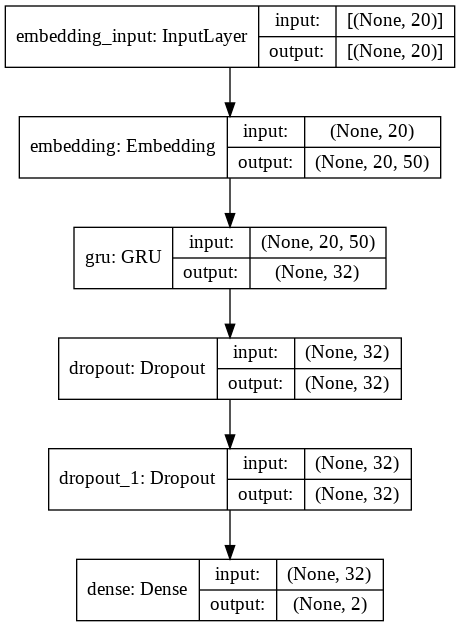

In [ ]:
# plot NN model 
plot_model(model, to_file='/content/gdrive/MyDrive/Depression Project/mlp-mnist.png', show_shapes=True)

In [ ]:
# compile the model 
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(padded_docs_train, y_train,
                    epochs=50, batch_size=512, 
                    validation_data = (padded_docs_cv, y_val)
                    )

Epoch 1/50
11/11 [==============================] - 32s 71ms/step - loss: 0.6946 - accuracy: 0.4905 - val_loss: 0.6921 - val_accuracy: 0.5400
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5161 - val_loss: 0.6910 - val_accuracy: 0.5400
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6923 - accuracy: 0.5260 - val_loss: 0.6911 - val_accuracy: 0.5400
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 0.6909 - accuracy: 0.5427 - val_loss: 0.6909 - val_accuracy: 0.5400
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6920 - accuracy: 0.5292 - val_loss: 0.6906 - val_accuracy: 0.5400
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 0.6918 - accuracy: 0.5289 - val_loss: 0.6907 - val_accuracy: 0.5400
Epoch 7/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6919 - accuracy: 0.5276 - val_loss: 0.6907 - val_accuracy: 0.5400
Epoch 8/50
1

### Evaluate the Model


In [ ]:
model.evaluate(padded_docs_test, y_test)

56/56 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.9092


[0.2765270173549652, 0.9092456102371216]

In [ ]:
x_test.head()

,Id,Text,Target
2143,2.9e+17,social life,0
2181,2.9e+17,good friends,1
4425,2.85e+17,listening love cause hate life,0
2577,2.9e+17,love never gets bored,1
2213,2.9e+17,best boyfriend ever,1


In [ ]:
x_test.to_csv('/content/gdrive/MyDrive/Depression Project/Test_Dataset.csv',index=False)

In [ ]:
pred = model.predict_classes(padded_docs_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import numpy as np
text = x_test["Text"]

In [ ]:
for i in range(1763):
  print("Text: ",x_test["Text"].iloc[i], "-->", "Actual Label: ", x_test["Target"].iloc[i], "-->", "Predicted: ", pred[i])

Text:  social life --> Actual Label:  0 --> Predicted:  0
Text:  good friends --> Actual Label:  1 --> Predicted:  1
Text:  listening love cause hate life --> Actual Label:  0 --> Predicted:  1
Text:  love never gets bored --> Actual Label:  1 --> Predicted:  0
Text:  best boyfriend ever --> Actual Label:  1 --> Predicted:  1
Text:  wow suck --> Actual Label:  0 --> Predicted:  0
Text:  life series unfounate fworded events --> Actual Label:  0 --> Predicted:  0
Text:  god bless --> Actual Label:  1 --> Predicted:  1
Text:  yes i sad --> Actual Label:  0 --> Predicted:  0
Text:  i ame life i loving every single moment --> Actual Label:  1 --> Predicted:  1
Text:  i feeling great --> Actual Label:  1 --> Predicted:  1
Text:  i made like worst mistakes ever --> Actual Label:  0 --> Predicted:  0
Text:  love life --> Actual Label:  1 --> Predicted:  1
Text:  fword life --> Actual Label:  0 --> Predicted:  0
Text:  new resolution drink life fword terrible --> Actual Label:  0 --> Predicted:

### Predict on Unseen Data 

In [ ]:
nd1 = ["i am the happiest person in this world"]
nd2 = ['i am excited']
nd3 = ['i would not change the past if I could']
nd4 = ['i get everything i want']
nd5 = ['everyday of my life is a celebration']
nd6 = ['my life is blessed']
nd7 = ['i feel complete']
nd8 = ['thank you god']
nd9 = ['i love my family']
nd10 = ['i am in a great mood']
nd11 = ['i never feel sad']   
nd12 = ['i hate chocolate']         

nd1pad = vect.texts_to_sequences(nd1)
nd1pad = pad_sequences(nd1pad, maxlen=9, padding='post')
prednd1 = model.predict_classes(nd1pad).item()
#prednd1a = (model.predict(nd1pad) > 0.5).astype("int32")
#prednd1c = np.argmax(prednd1)
#print(prednd1a, prednd1b, prednd1c)


nd2pad = vect.texts_to_sequences(nd2)
nd2pad = pad_sequences(nd2pad, maxlen=3, padding='post')
prednd2 = model.predict_classes(nd2pad).item()


nd3pad = vect.texts_to_sequences(nd3)
nd3pad = pad_sequences(nd3pad, maxlen=9, padding='post')
prednd3 = model.predict_classes(nd3pad).item()

nd4pad = vect.texts_to_sequences(nd4)
nd4pad = pad_sequences(nd4pad, maxlen=5, padding='post')
prednd4 = model.predict_classes(nd4pad).item()

nd5pad = vect.texts_to_sequences(nd5)
nd5pad = pad_sequences(nd5pad, maxlen=7, padding='post')
prednd5 = model.predict_classes(nd5pad).item()

nd6pad = vect.texts_to_sequences(nd6)
nd6pad = pad_sequences(nd6pad, maxlen=4, padding='post')
prednd6 = model.predict_classes(nd6pad).item()


nd7pad = vect.texts_to_sequences(nd7)
nd7pad = pad_sequences(nd7pad, maxlen=3, padding='post')
prednd7 = model.predict_classes(nd7pad).item()

nd8pad = vect.texts_to_sequences(nd8)
nd8pad = pad_sequences(nd8pad, maxlen=3, padding='post')
prednd8 = model.predict_classes(nd8pad).item()

nd9pad = vect.texts_to_sequences(nd9)
nd9pad = pad_sequences(nd9pad, maxlen=4, padding='post')
prednd9 = model.predict_classes(nd9pad).item()

nd10pad = vect.texts_to_sequences(nd10)
nd10pad = pad_sequences(nd10pad, maxlen=8, padding='post')
prednd10 = model.predict_classes(nd10pad).item()

nd11pad = vect.texts_to_sequences(nd11)
nd11pad = pad_sequences(nd11pad, maxlen=4, padding='post')
prednd11 = model.predict_classes(nd11pad).item()

nd12pad = vect.texts_to_sequences(nd12)
nd12pad = pad_sequences(nd12pad, maxlen=3, padding='post')
prednd12 = model.predict_classes(nd12pad).item()
#prednd12 = (model.predict(nd12pad) > 0.5).astype("int32")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("Text: ",nd1, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd1)
print("Text: ",nd2, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd2)
print("Text: ",nd3, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd3)
print("Text: ",nd4, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd4)
print("Text: ",nd5, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd5)
print("Text: ",nd6, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd6)
print("Text: ",nd7, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd7)
print("Text: ",nd8, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd8)
print("Text: ",nd9, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd9)
print("Text: ",nd10, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd10)
print("Text: ",nd11, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd11)
print("Text: ",nd12, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd12)

Text:  ['i am the happiest person in this world'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i am excited'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i would not change the past if I could'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i get everything i want'] --> Actual Label:  1 --> Predicted:  1
Text:  ['everyday of my life is a celebration'] --> Actual Label:  1 --> Predicted:  0
Text:  ['my life is blessed'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i feel complete'] --> Actual Label:  1 --> Predicted:  1
Text:  ['thank you god'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i love my family'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i am in a great mood'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i never feel sad'] --> Actual Label:  1 --> Predicted:  0
Text:  ['i hate chocolate'] --> Actual Label:  1 --> Predicted:  0


In [ ]:
d1 = ['i have lost in life']
d2 = ['why do i have to be sad']
d3 = ['i have never been so disappointed in life']
d4 = ['i feel like crying'] 
d5 = ['i hate the world'] 
d6 = ['why is everything so hard'] 
d7 = ['i feel miserable']
d8 = ['i live in a terrible place'] 
d9 = ['i cry all day'] 
d10 = ['i am not lucky nor blessed']
d11 = ['nobody loves me']
d12 = ['i am unlucky']         

d1pad = vect.texts_to_sequences(d1)
d1pad = pad_sequences(nd1pad, maxlen=6, padding='post')
#prednd1 = (model.predict(nd1pad) > 0.5).astype("int32")
predd1 = model.predict_classes(d1pad).item()


d2pad = vect.texts_to_sequences(d2)
d2pad = pad_sequences(d2pad, maxlen=7, padding='post')
predd2 = model.predict_classes(d2pad).item()

d3pad = vect.texts_to_sequences(d3)
d3pad = pad_sequences(d3pad, maxlen=8, padding='post')
predd3 = model.predict_classes(d3pad).item()

d4pad = vect.texts_to_sequences(d4)
d4pad = pad_sequences(d4pad, maxlen=4, padding='post')
predd4 = model.predict_classes(d4pad).item()

d5pad = vect.texts_to_sequences(d5)
d5pad = pad_sequences(d5pad, maxlen=4, padding='post')
predd5 = model.predict_classes(d5pad)
predd5 = np.argmax(predd5)

d6pad = vect.texts_to_sequences(d6)
d6pad = pad_sequences(d6pad, maxlen=5, padding='post')
predd6 = model.predict_classes(d6pad).item()

d7pad = vect.texts_to_sequences(d7)
d7pad = pad_sequences(d7pad, maxlen=3, padding='post')
predd7 = model.predict_classes(d7pad).item()

d8pad = vect.texts_to_sequences(d8)
d8pad = pad_sequences(d8pad, maxlen=4, padding='post')
predd8 = model.predict_classes(d8pad).item()

d9pad = vect.texts_to_sequences(d9)
d9pad = pad_sequences(d9pad, maxlen=4, padding='post')
predd9 = model.predict_classes(d9pad).item()

d10pad = vect.texts_to_sequences(d10)
d10pad = pad_sequences(d10pad, maxlen=6, padding='post')
predd10 = model.predict_classes(d10pad).item()

d11pad = vect.texts_to_sequences(d11)
d11pad = pad_sequences(d11pad, maxlen=3, padding='post')
predd11 = model.predict_classes(d11pad).item()

d12pad = vect.texts_to_sequences(d12)
d12pad = pad_sequences(d12pad, maxlen=5, padding='post')
predd12 = model.predict_classes(d12pad).item()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("Text: ",d1, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd1)
print("Text: ",d2, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd2)
print("Text: ",d3, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd3)
print("Text: ",d4, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd4)
print("Text: ",d5, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd5)
print("Text: ",d6, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd6)
print("Text: ",d7, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd7)
print("Text: ",d8, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd8)
print("Text: ",d9, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd9)
print("Text: ",d10, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd10)
print("Text: ",d11, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd11)
print("Text: ",d12, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd12)

Text:  ['i have lost in life'] --> Actual Label:  0 --> Predicted:  1
Text:  ['why do i have to be sad'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i have never been so disappointed in life'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i feel like crying'] --> Actual Label:  0 --> Predicted:  1
Text:  ['i hate the world'] --> Actual Label:  0 --> Predicted:  0
Text:  ['why is everything so hard'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i feel miserable'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i live in a terrible place'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i cry all day'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i am not lucky nor blessed'] --> Actual Label:  0 --> Predicted:  1
Text:  ['nobody loves me'] --> Actual Label:  0 --> Predicted:  1
Text:  ['i am unlucky'] --> Actual Label:  0 --> Predicted:  1


### Plot Results in a Graph 

In [ ]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

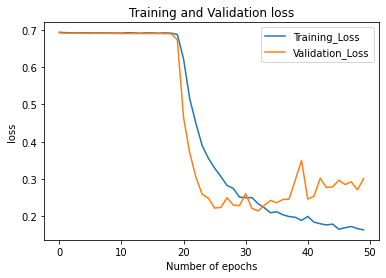

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

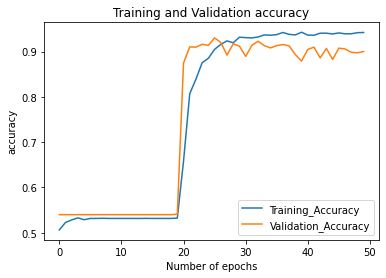

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

### Metrics

In [ ]:
#pred = model.predict(padded_docs_test)
y_test=np.argmax(y_test, axis=1)
pred = pred.round()
cm = confusion_matrix(y_test, pred)
print(cm)

[[725  92]
 [ 68 878]]


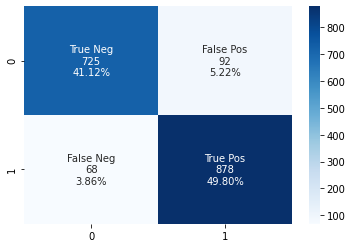

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy: ", accuracy_score(y_test, pred))
print("F1: ", f1_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred))
print("Recall: ", recall_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       817
           1       0.91      0.93      0.92       946

    accuracy                           0.91      1763
   macro avg       0.91      0.91      0.91      1763
weighted avg       0.91      0.91      0.91      1763

Accuracy:  0.9092456040839478
F1:  0.9164926931106472
Precision:  0.9051546391752577
Recall:  0.9281183932346723
